In [80]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools  import adfuller
%matplotlib inline
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base import  datetools

In [71]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

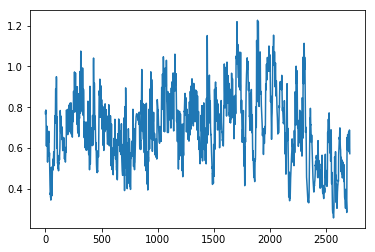

In [82]:
df = pd.read_csv('/home/gempak/tuticorin_mikehr.csv')

#adf_test(df['swh'])
#adf_test(df['MikeHR'])
df['MikeHR'].plot()
df['swh'].plot()

df_difference = df['MikeHR'].diff()

In [77]:
test_obs = 12
train = df_difference[:-test_obs]
test = df_difference[-test_obs:]

In [78]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

ValueError: Only gave one variable to VAR